In [ ]:
#Introduction & Objectif
Build a credit scoring model to predict a customers probability of default in order to assist in credit granting decisions.

In [12]:
pip install xlrd

   ---------------------------------------- 0.0/96.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/96.6 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/96.6 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/96.6 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/96.6 kB ? eta -:--:--
   ------------ --------------------------- 30.7/96.6 kB 186.2 kB/s eta 0:00:01
   ---------------- ----------------------- 41.0/96.6 kB 178.6 kB/s eta 0:00:01
   --------------------------------- ------ 81.9/96.6 kB 286.7 kB/s eta 0:00:01
   ---------------------------------------- 96.6/96.6 kB 306.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Importation of librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Load data
df = pd.read_excel("C:\\Users\\Admin\\default of credit card clients.xls", header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
#Data informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
No missing values were detected in the dataset, ensuring good initial data quality.

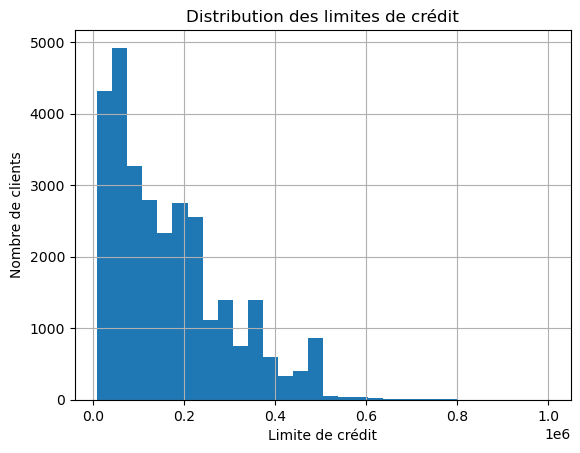

In [7]:
#premiere visualisation
import matplotlib.pyplot as plt

df['LIMIT_BAL'].hist(bins=30)
plt.title("Distribution des limites de crédit")
plt.xlabel("Limite de crédit")
plt.ylabel("Nombre de clients")
plt.show()

In [5]:
The target variable is binary and indicates whether the customer will be in default of payment the following month.
Variable	Signification

Traditional real credit scoring variables.
LIMIT_BAL	  Credit limit granted
PAY_0         Most recent repayment status
BILL_AMT      Amount billed
PAY_AMT       Amount paid
AGE           Customer age
SEX           Gender   Gender
EDUCATION     Level of education
MARRIAGE      Marital status

SyntaxError: invalid syntax (1175723888.py, line 1)

In [8]:
df['default payment next month'].value_counts()
df['default payment next month'].value_counts(normalize=True)

default payment next month
0    0.7788
1    0.2212
Name: proportion, dtype: float64

In [6]:
Analysis of the target variable shows an imbalance in the classes, with approximately 22% of customers in default. 
This situation is typical of credit scoring issues and requires the use of appropriate metrics and specific techniques during modelling.

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [9]:
df.groupby('default payment next month')['LIMIT_BAL'].mean()

default payment next month
0    178099.726074
1    130109.656420
Name: LIMIT_BAL, dtype: float64

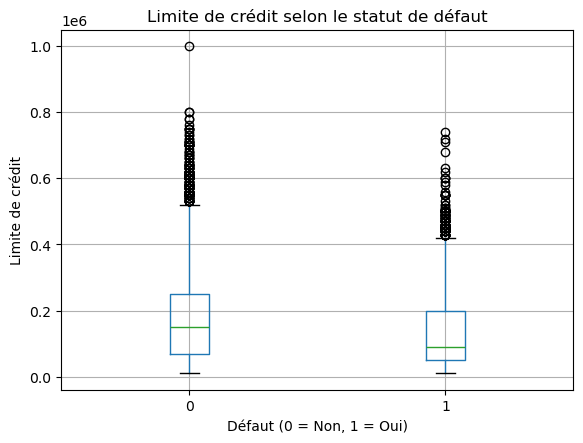

In [10]:
import matplotlib.pyplot as plt

df.boxplot(column='LIMIT_BAL', by='default payment next month')
plt.title("Limite de crédit selon le statut de défaut")
plt.suptitle("")
plt.xlabel("Défaut (0 = Non, 1 = Oui)")
plt.ylabel("Limite de crédit")
plt.show()

In [ ]:
Les clients présentant une faible limite de crédit ont une probabilité plus élevée de défaut de paiement.
C’est une variable discriminante majeure pour le scoring crédit

L’analyse bivariée montre que les clients en situation de défaut disposent en moyenne de limites de crédit significativement plus faibles 
que les clients non défaillants, ce qui confirme l’importance de la variable LIMIT_BAL dans la prédiction du risque de crédit.

In [11]:
df.groupby('default payment next month')['PAY_0'].mean()

default payment next month
0   -0.211222
1    0.668174
Name: PAY_0, dtype: float64

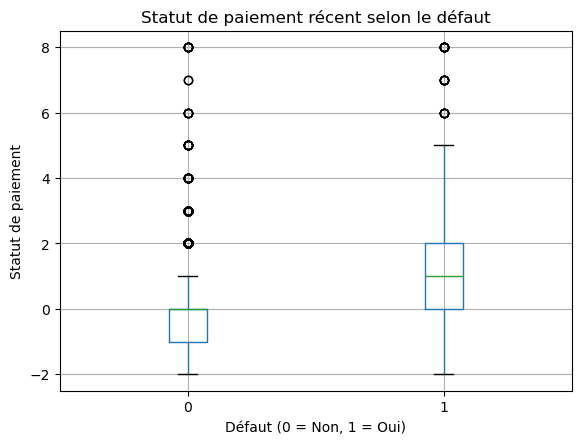

In [12]:
df.boxplot(column='PAY_0', by='default payment next month')
plt.title("Statut de paiement récent selon le défaut")
plt.suptitle("")
plt.xlabel("Défaut (0 = Non, 1 = Oui)")
plt.ylabel("Statut de paiement")
plt.show()

In [ ]:
Le statut de paiement récent est un indicateur très fort du risque de défaut. 
Les clients ayant connu des retards récents présentent une probabilité de défaut significativement plus élevée.

L’analyse bivariée met en évidence une relation forte entre le statut de paiement récent (PAY_0) et le défaut de paiement.
Les clients présentant des retards récents ont une probabilité de défaut nettement plus élevée.

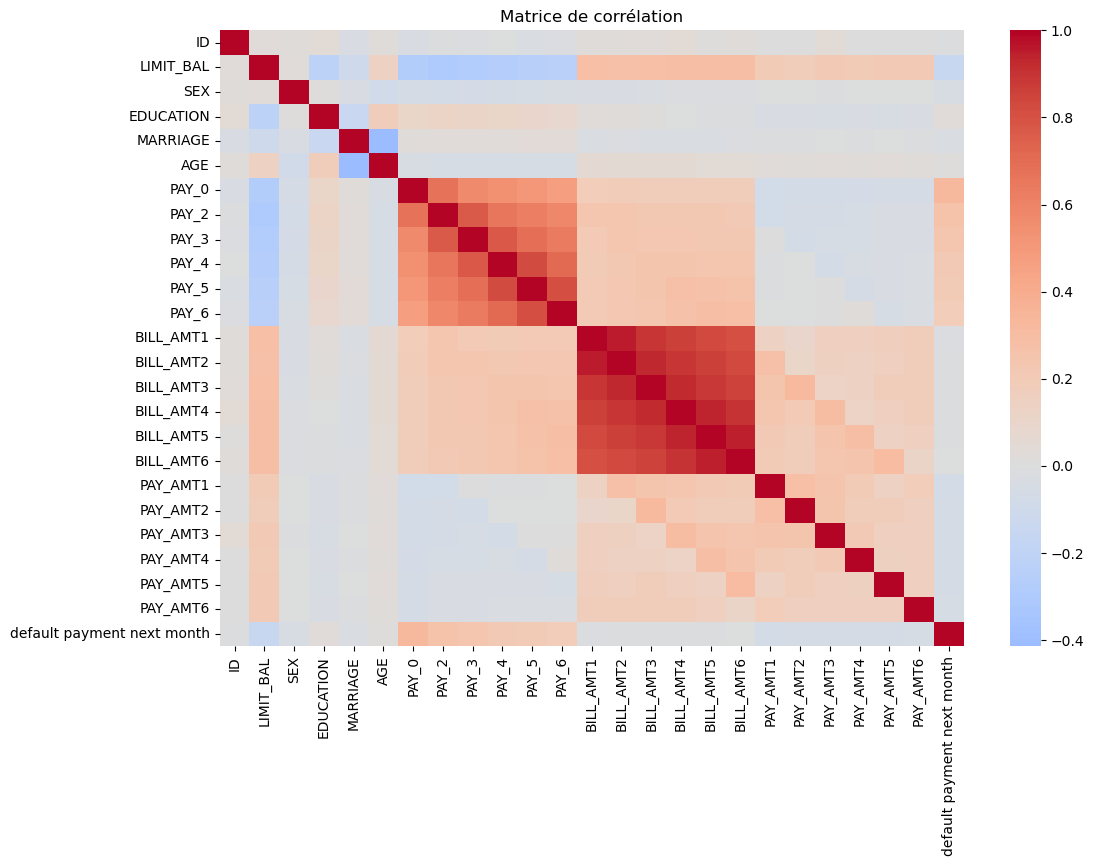

In [13]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title("Matrice de corrélation")
plt.show()

In [ ]:
La matrice de corrélation met en évidence une forte redondance entre les variables liées aux retards de paiement et aux montants de mensualité. 
Les variables de statut de paiement présentent la corrélation la plus élevée avec la variable cible,
confirmant leur importance dans le modèle de scoring crédit.

L’EDA a permis d’identifier les variables clés du risque de défaut, notamment les statuts de paiement récents et les montants facturés.
Ces résultats orientent les choix de preprocessing et de modélisation.

In [14]:
#SUPPRESSION DES VARIABLES INUTILES
#La variable ID a été supprimée car elle n’apporte aucune information pertinente pour la prédiction du défaut.
df = df.drop(columns=['ID'])

In [15]:
bill_cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3',
             'BILL_AMT4','BILL_AMT5','BILL_AMT6']

df['BILL_AMT_MEAN'] = df[bill_cols].mean(axis=1)

In [16]:
pay_cols = ['PAY_AMT1','PAY_AMT2','PAY_AMT3',
            'PAY_AMT4','PAY_AMT5','PAY_AMT6']

df['PAY_AMT_MEAN'] = df[pay_cols].mean(axis=1)

In [ ]:
Des variables agrégées ont été créées afin de résumer le comportement financier des clients et de réduire la redondance entre les variables temporelles.

In [17]:
pay_status_cols = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
df['PAY_STATUS_MEAN'] = df[pay_status_cols].mean(axis=1)

In [18]:
df = df.drop(columns=bill_cols + pay_cols)

In [19]:
y = df['default payment next month']
X = df.drop(columns=['default payment next month'])

In [20]:
#Les variables explicatives ont été séparées de la variable cible afin de préparer la phase de modélisation.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Les variables ont été standardisées afin d’assurer une convergence optimale des modèles sensibles à l’échelle des données.

In [22]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

In [23]:
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77      5841
           1       0.37      0.63      0.47      1659

    accuracy                           0.68      7500
   macro avg       0.62      0.66      0.62      7500
weighted avg       0.76      0.68      0.70      7500



In [25]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC:", roc_auc)

ROC AUC: 0.7137607519499818


In [ ]:
Le modèle de régression logistique atteint un ROC AUC de 0.71 et permet de détecter 63 % des clients en défaut. 
Ce niveau de performance est cohérent avec un premier modèle de scoring crédit et constitue une base solide pour des améliorations futures.

In [27]:
#AMÉLIORER LE MODÈLE
from sklearn.metrics import classification_report

y_pred_custom = (y_proba >= 0.4).astype(int)
print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.87      0.41      0.56      5841
           1       0.28      0.79      0.41      1659

    accuracy                           0.49      7500
   macro avg       0.57      0.60      0.48      7500
weighted avg       0.74      0.49      0.53      7500



In [ ]:
| Stratégie  | Seuil | Effet                               |
| ---------- | ----- | ----------------------------------- |
| Prudente   | Bas   | Peu de défauts mais peu de clients  |
| Équilibrée | 0.5   | Bon compromis                       |
| Agressive  | Haut  | Plus de clients mais plus de risque |

L’ajustement du seuil de décision permet d’augmenter significativement la détection des clients à risque, 
au prix d’un taux plus élevé de refus de clients solvables. Ce compromis illustre les arbitrages classiques en gestion du risque de crédit.

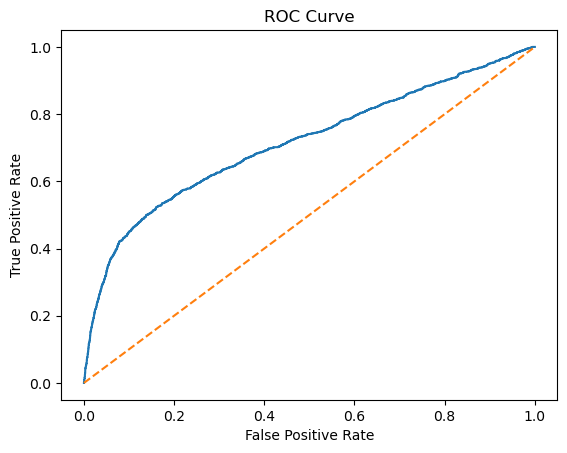

In [28]:
#Visualiser la courbe ROC
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [29]:
#Choisir un seuil OPTIMAL
import numpy as np

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5513180168952019

In [30]:
optimal_threshold = 0.5513180168952019

y_pred_opt = (y_proba >= optimal_threshold).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_opt))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      5841
           1       0.48      0.52      0.50      1659

    accuracy                           0.77      7500
   macro avg       0.67      0.68      0.68      7500
weighted avg       0.78      0.77      0.77      7500



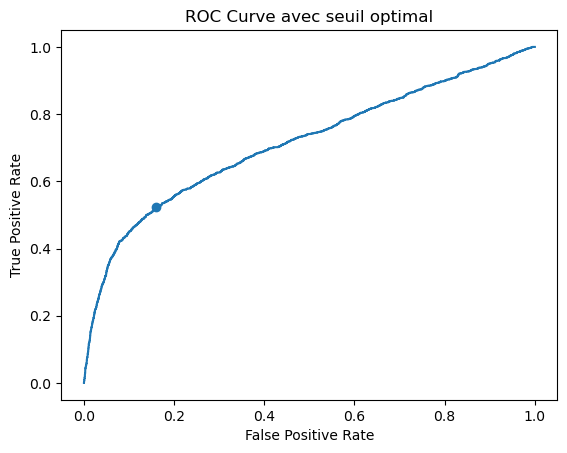

In [31]:
plt.figure()
plt.plot(fpr, tpr)
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve avec seuil optimal")
plt.show()

In [32]:
def credit_decision(prob_default):
    if prob_default >= optimal_threshold:
        return "REFUS"
    elif prob_default >= 0.4:
        return "ANALYSE MANUELLE"
    else:
        return "ACCORD"

In [ ]:
CONCLUSION FINALE DU PROJET

Ce projet a permis de développer un modèle de scoring crédit basé sur une régression logistique, 
intégrant une phase complète d’EDA, de feature engineering et d’optimisation du seuil de décision. 
Le modèle atteint une performance satisfaisante avec un ROC AUC de 0.71 et offre une interprétabilité adaptée aux exigences réglementaires.